In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
import pandas as pd
s_scores = pd.DataFrame(columns=['with_pca', 'without_pca'],index=['k_mean', 'Hierarchical', 'DBSCAN','GaussianMixture'])
s_scores

,with_pca,without_pca
k_mean,NaN,NaN
Hierarchical,NaN,NaN
DBSCAN,NaN,NaN
GaussianMixture,NaN,NaN


In [3]:
#read the data

#data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv('CC GENERAL.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.shape

(8950, 18)

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Checking the percentage of missing data
(df.isnull().sum()/df['CUST_ID'].count())*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [9]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# drop nulls 
df.dropna(inplace=True)

In [11]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
df = df.drop('CUST_ID', axis=1)

In [13]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [14]:
# make sure that no nulls
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
cols= df.columns
cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [16]:
cols= list(cols)
cols

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

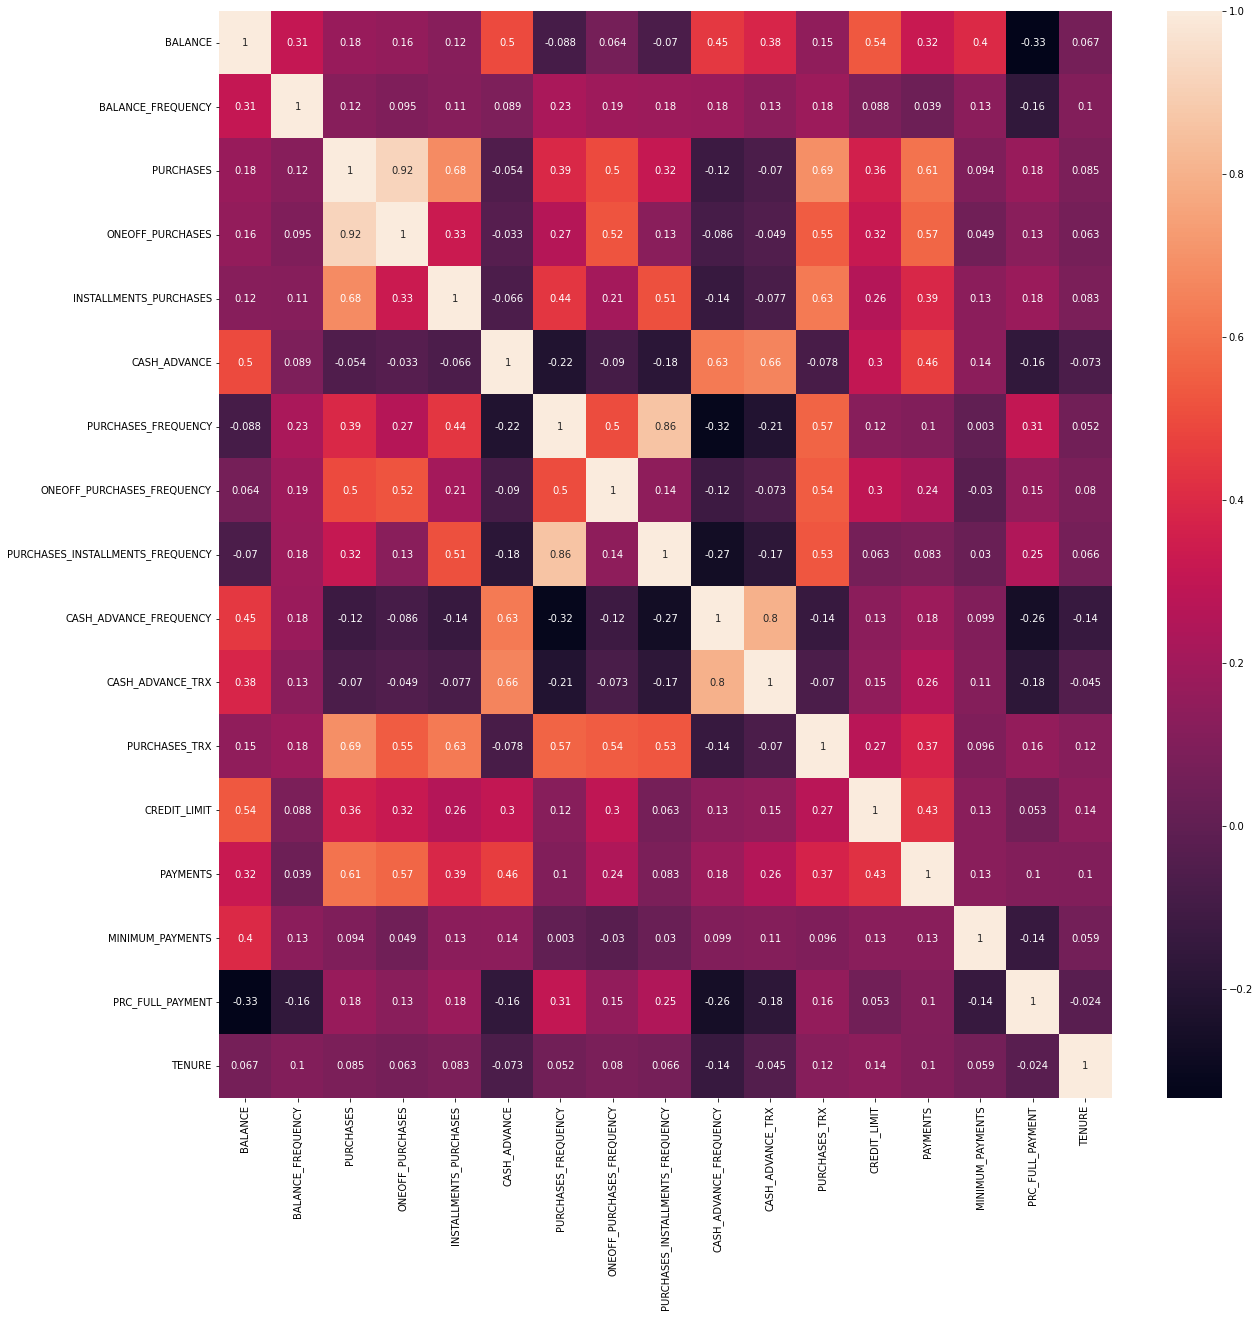

In [17]:
plt.figure(figsize=(20,20))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [19]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
4,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
5,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8945,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8947,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8948,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


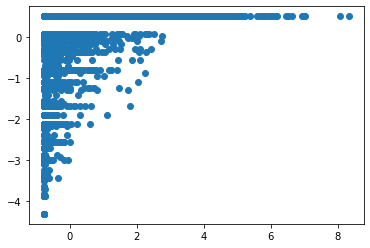

In [20]:
plt.scatter(df['BALANCE'], df['BALANCE_FREQUENCY'])

### K-means

- **without PCA**

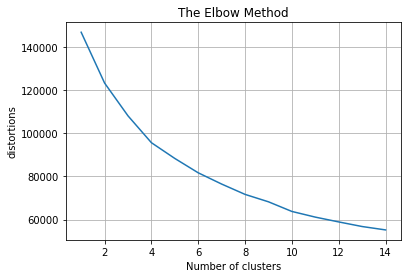

In [21]:
# elbow method
from sklearn.cluster import KMeans
distortions = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1, 15), distortions)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distortions')
plt.grid()
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)
kmeans.labels_

array([3, 0, 1, ..., 1, 3, 3], dtype=int32)

In [23]:
# distortion
kmeans.inertia_

95646.58815731185

In [24]:
#kmean silhouette_score
from sklearn import metrics
s1 = metrics.silhouette_score(df,kmeans.labels_)
s1

0.19703675772374923

In [25]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(df)
kmeans.labels_

array([2, 0, 1, ..., 7, 7, 7], dtype=int32)

In [26]:
kmeans.inertia_

72710.3145423229

In [27]:
s1 = metrics.silhouette_score(df,kmeans.labels_)
s1

0.21198434081381115

In [28]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(df)
labels = kmeans.labels_

In [29]:
s1 = metrics.silhouette_score(df,kmeans.labels_)
s1

0.21198434081381115

- **with PCA**

In [30]:
from sklearn.decomposition import PCA
# pass through the scaled data set into our PCA class object
pca = PCA().fit(df)

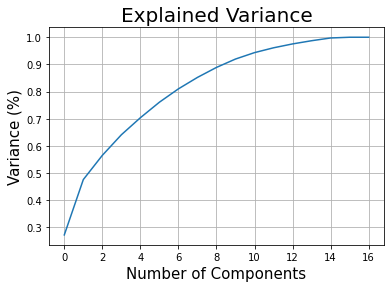

In [31]:
# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)
plt.grid()

# show the plot
plt.show()

In [32]:
pca = PCA(.80) 
pca.fit(df)

df_pca = pca.transform(df)
df_pca = pd.DataFrame(df_pca)

print(f'''Shape of X before PCA: {df.shape}
Shape of X after PCA: {df_pca.shape}''')

Shape of X before PCA: (8636, 17)
Shape of X after PCA: (8636, 7)


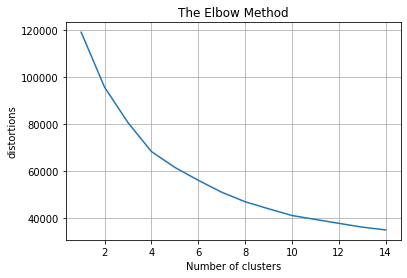

In [33]:
from sklearn.cluster import KMeans
distortions = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df_pca)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1, 15), distortions)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distortions')
plt.grid()
plt.show()

In [34]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_pca)
kmeans.labels_

array([1, 0, 3, ..., 3, 1, 1], dtype=int32)

In [35]:
# distortion
kmeans.inertia_

68173.6932237947

In [36]:
s2 = metrics.silhouette_score(df_pca,kmeans.labels_)
s2

0.2513923789504817

In [37]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(df_pca)
labels = kmeans.labels_

In [38]:
s2 = metrics.silhouette_score(df_pca,kmeans.labels_)
s2

0.26596171359898985

In [39]:
s_scores.loc['k_mean']=[s1,s2]

In [40]:
df.to_numpy().shape

(8636, 17)

In [41]:
df.shape

(8636, 17)

In [42]:
from sklearn.metrics.pairwise import cosine_similarity
#dist = 1 - cosine_similarity(df.to_numpy())

pca = PCA(2)
pca.fit(df)
X_PCA = pca.transform(df)
X_PCA.shape

(8636, 2)

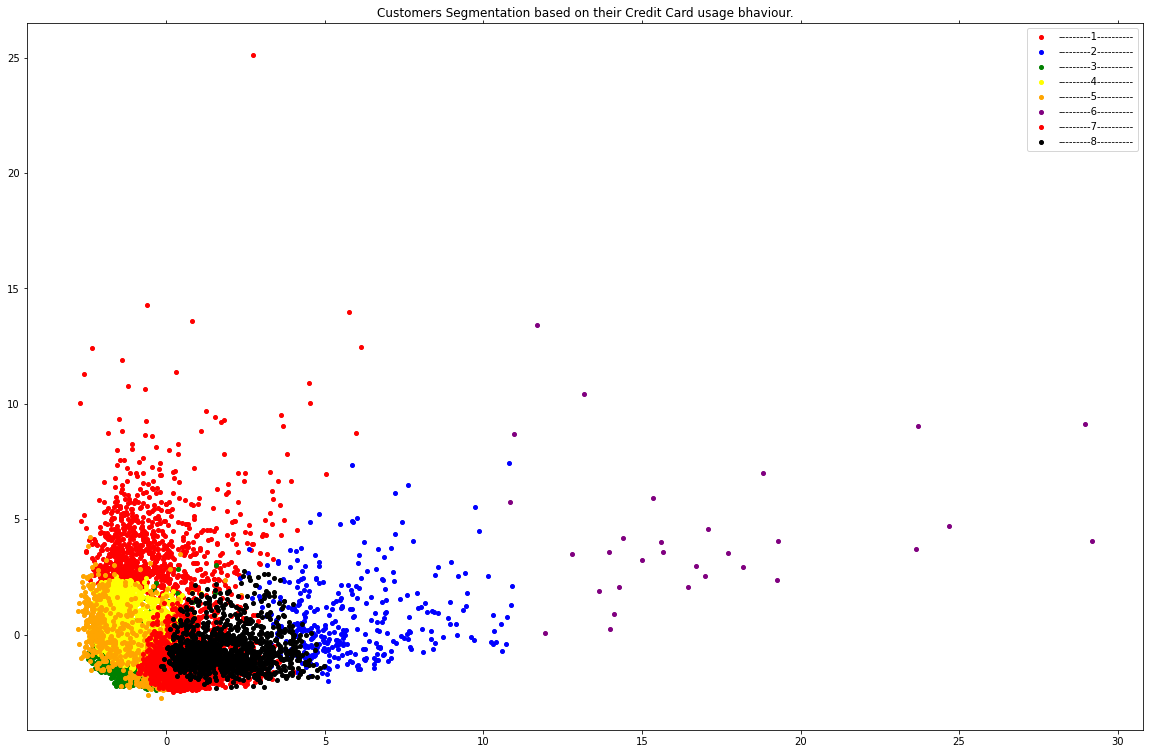

In [43]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          6: 'red', 
          7: 'black'}

names = {0: '---------1----------', 
         1: '---------2----------', 
         2: '---------3----------', 
         3: '---------4----------', 
         4: '---------5----------',
         5: '---------6----------', 
         6: '---------7----------', 
         7: '---------8----------'}
  
dff = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = dff.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4,
            color=colors[name],label=names[name])
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()



## Hierarchical

- **without PCA**

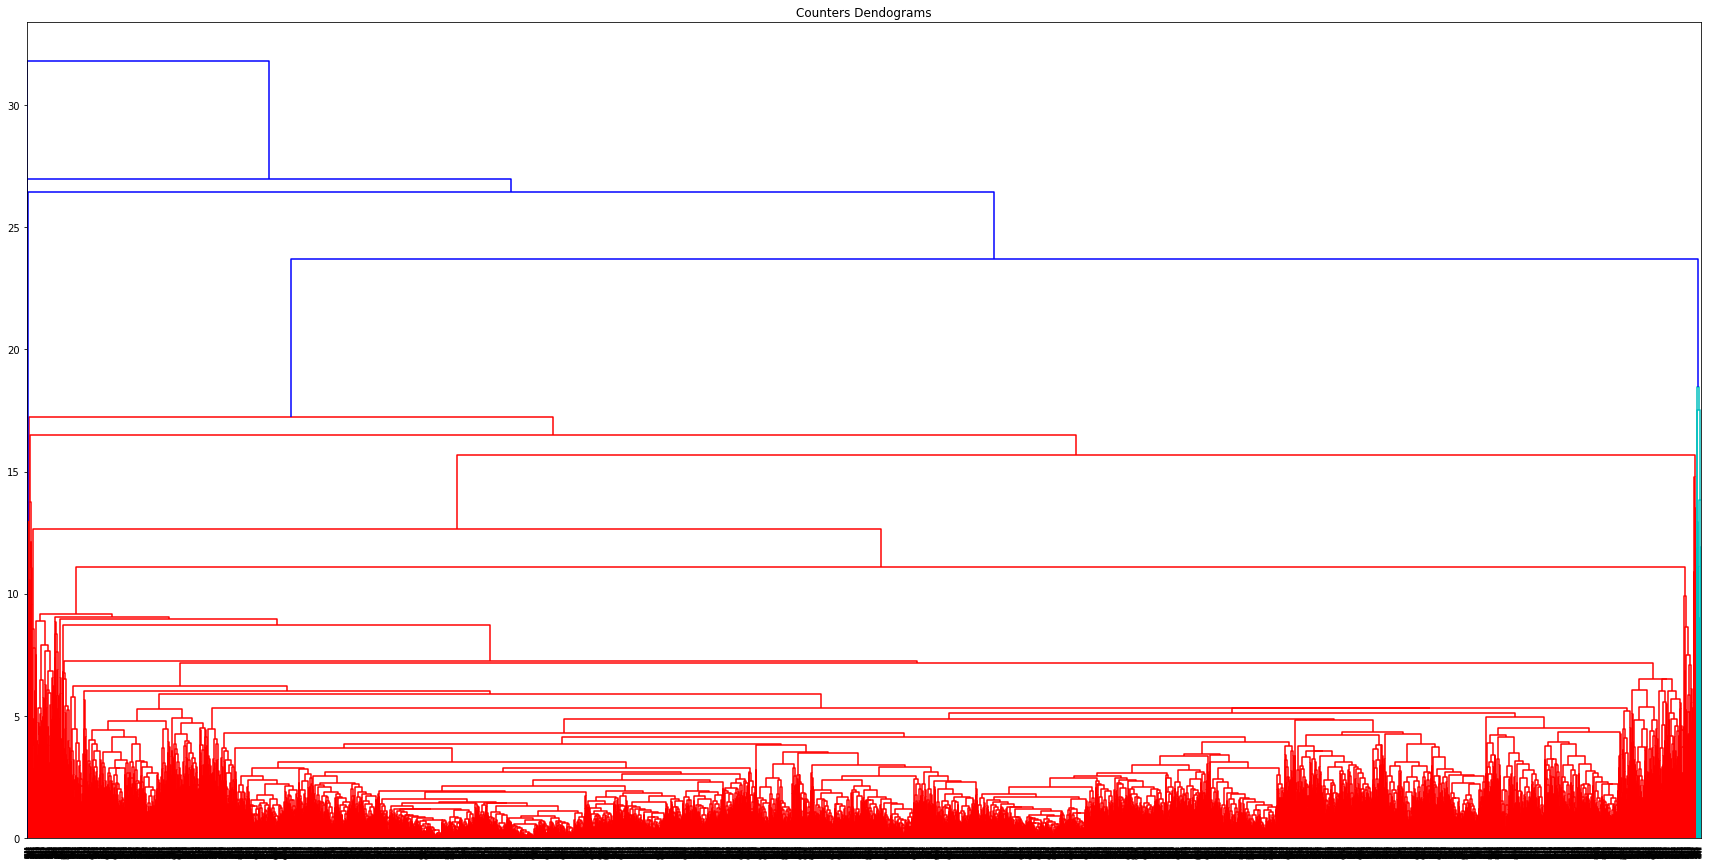

In [44]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(30, 15))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df , method='average',metric='euclidean'))

In [45]:
from sklearn.cluster import AgglomerativeClustering

Hierarchical = AgglomerativeClustering(n_clusters=2).fit(df)
labels = Hierarchical.labels_

In [46]:
labels

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
s1 = metrics.silhouette_score(df,Hierarchical.labels_)
s1

0.18418454528547495

In [48]:
Hierarchical = AgglomerativeClustering(n_clusters=8).fit(df)
labels = Hierarchical.labels_

In [49]:
s = metrics.silhouette_score(df, labels)
s

0.1770535189599759

In [50]:
Hierarchical = AgglomerativeClustering(n_clusters=4).fit(df)
labels = Hierarchical.labels_

In [51]:
s = metrics.silhouette_score(df, labels)
s

0.1626116943237927

- **with PCA**

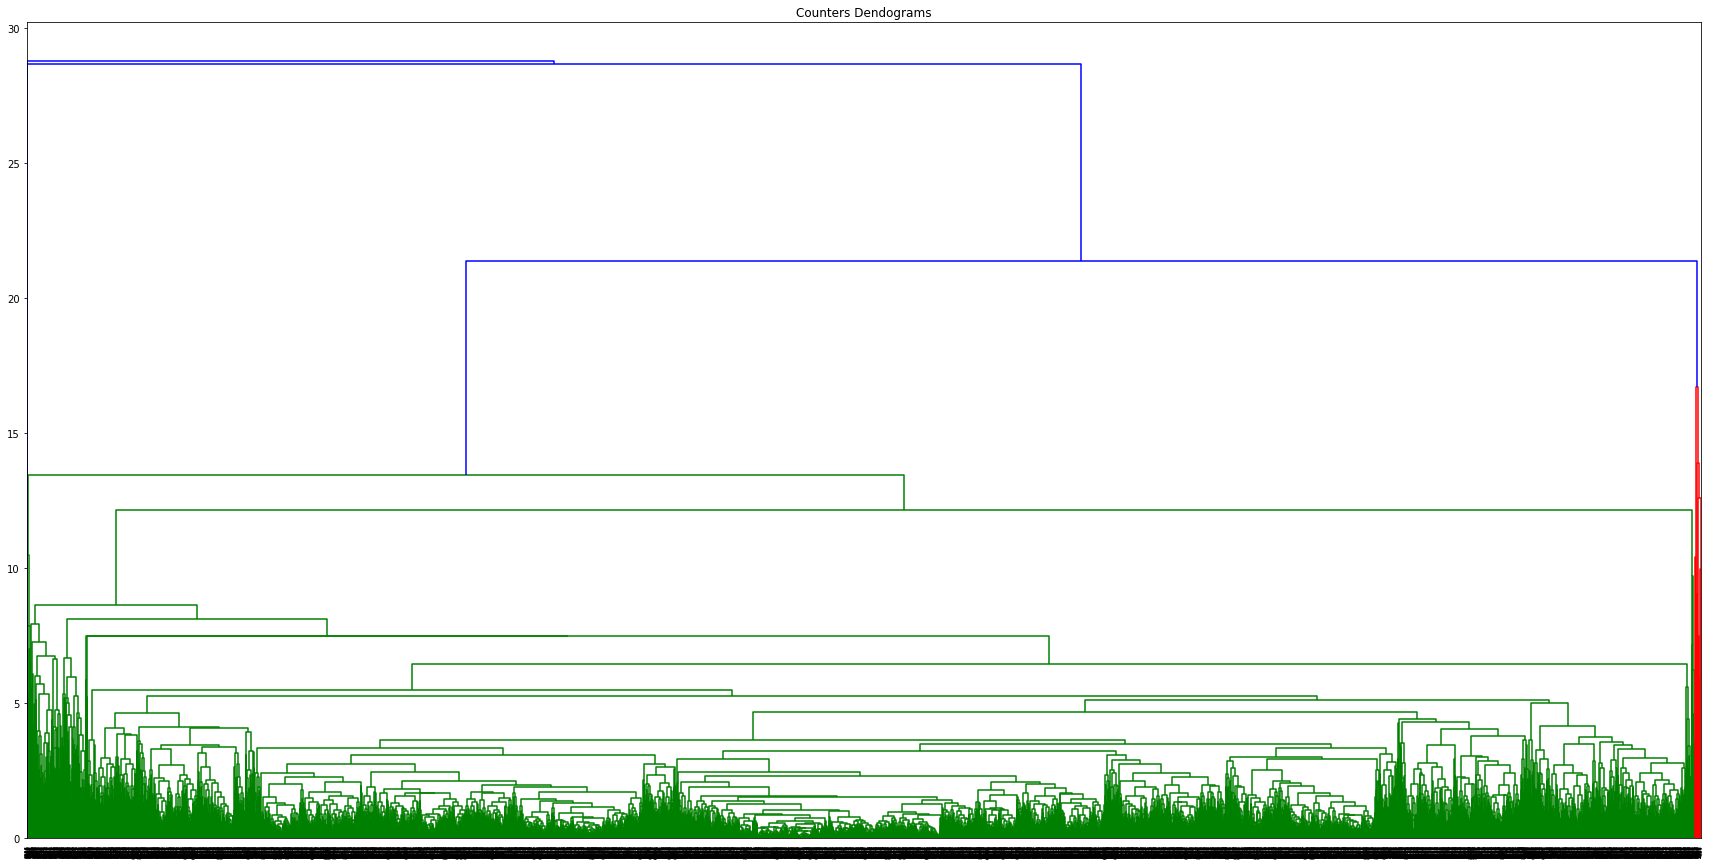

In [52]:
plt.figure(figsize=(30, 15))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_pca , method='average',metric='euclidean'))

In [53]:
Hierarchical = AgglomerativeClustering(n_clusters=2).fit(df_pca)
labels = Hierarchical.labels_

In [54]:
s2 = metrics.silhouette_score(df_pca,Hierarchical.labels_)
s2

0.2138078111822297

In [55]:
s_scores.loc['Hierarchical']=[s1,s2]

### **DBSCAN**

In [56]:
from sklearn.cluster import DBSCAN
# without pca
dbscan = DBSCAN(eps=2, min_samples=5).fit(df)
labels = dbscan.labels_

In [57]:
np.unique(labels)

array([-1,  0,  1])

In [58]:
s1 = metrics.silhouette_score(df,dbscan.labels_)
s1

0.38983591171444737

In [59]:
#with pca
dbscan = DBSCAN(eps=2, min_samples=10).fit(df_pca)
labels = dbscan.labels_

In [60]:
np.unique(labels)

array([-1,  0])

In [61]:
s2 = metrics.silhouette_score(df_pca,dbscan.labels_)
s2

0.5996047768916518

In [62]:
s_scores.loc['DBSCAN']=[s1,s2]

In [63]:
pca = PCA(2)
pca.fit(df)
X_PCA = pca.transform(df)
X_PCA.shape

(8636, 2)

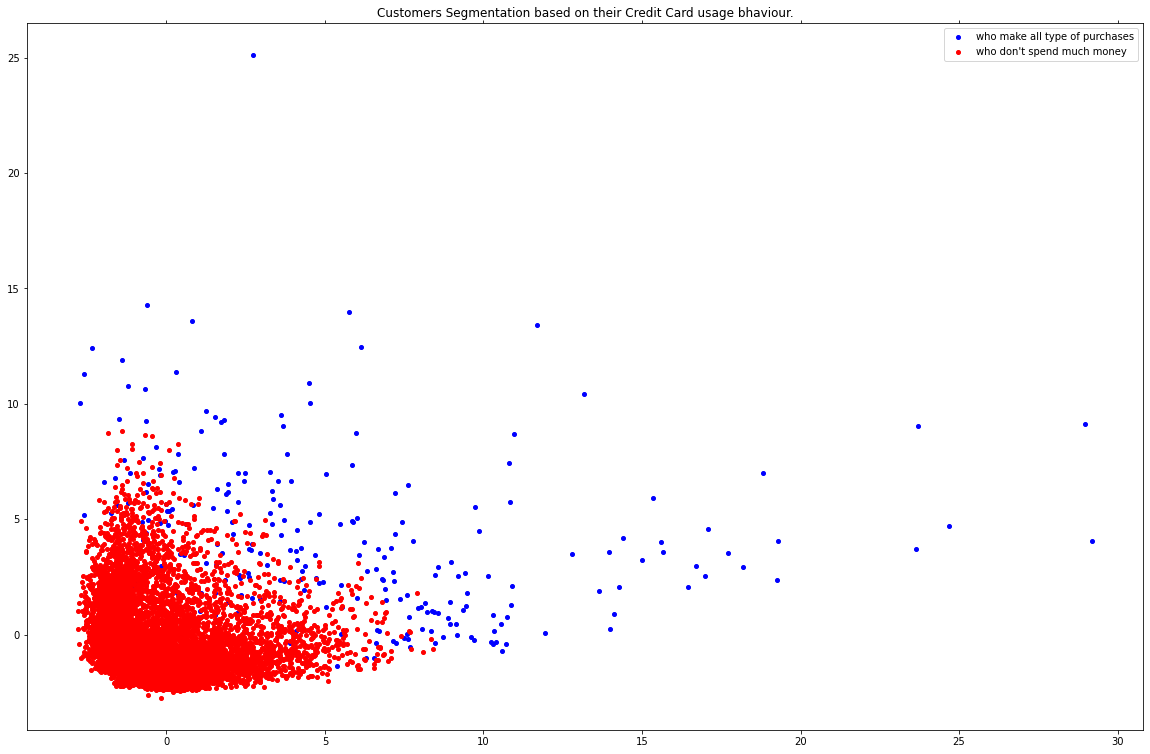

In [64]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'blue',
          1:'red'
          }

names = {0: 'who make all type of purchases', 
         1:'who don\'t spend much money'
        }
  
dff = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = dff.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, color=colors[name+1],label=names[name+1])
  ax.set_aspect('auto')
  ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
  ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()



### GaussianMixture

In [65]:
from sklearn.mixture import GaussianMixture

In [66]:
#without pca
for i in range(2,10):
    gm = GaussianMixture(i).fit(df)
    labels = gm.predict(df)
    print(metrics.silhouette_score(df,labels))

0.18377932033380542
0.0991332347275003
0.080665139315684
0.07629440406340741
0.06675409988033837
0.04221281621178063
0.040640812228251236
0.03697107902838311


In [67]:
gm = GaussianMixture(2).fit(df)
labels = gm.predict(df)
s1 = metrics.silhouette_score(df,labels)
s1

0.18368879420518044

In [68]:
# with pca
for i in range(2,10):
    gm = GaussianMixture(i).fit(df_pca)
    labels = gm.predict(df_pca)
    print(metrics.silhouette_score(df_pca,labels))

0.23037380746086542
0.1088584053170929
0.0909609404235423
0.03989812777842631
0.04722014365669991
-0.03152082511417057
0.0023496956396869425
-0.013841921665279049


In [69]:
gm = GaussianMixture(2).fit(df_pca)
labels = gm.predict(df_pca)
s2 = metrics.silhouette_score(df_pca,labels)
s2

0.23037380746086542

In [70]:
s_scores.loc['GaussianMixture']=[s1,s2]

### compare

In [71]:
s_scores

,with_pca,without_pca
k_mean,0.211984,0.265962
Hierarchical,0.184185,0.213808
DBSCAN,0.389836,0.599605
GaussianMixture,0.183689,0.230374
